In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [2]:
# Resource files
csvfile_list = ['./Resources/Colorado/Total_Taxes.csv',
                './Resources/Colorado/Alcoholic_Beverages_Sales_Tax.csv',
                './Resources/Colorado/Other_Selective_Sales_and_Gross_Receipts_Taxes.csv',
                './Resources/Colorado/General_Sales_and_Gross_Receipts_Taxes.csv',
                './Resources/Colorado/Alcoholic_Beverages_License.csv',
                './Resources/Colorado/Tobacco_Products_Sales_Tax.csv']
csvfile_Marijuana = "./Resources/Colorado/Marijuana_taxes.csv"

# Output files
csvfile_output = './Outputs/Output_Colorado.csv'
pngfile_tax_curve = './Outputs/Tax_curve_Colorado.png'
pngfile_tax_pie   = './Outputs/Tax_pie_Colorado'


In [3]:
# Get the tax data from files
n_unit = 1000000    # Millions of USD
n_count = -1
for file_name in csvfile_list:
    n_count += 1
    # Get tax data
    df_tax = pd.read_csv(file_name)
    # Get tax name
    s_tax_name = file_name.split("/")[3].split(".csv")[0]
    # Merge data
    if (n_count == 0):
        df_taxes = df_tax.rename(columns={"Value":s_tax_name})
        df_taxes[s_tax_name] = pd.to_numeric(df_taxes[s_tax_name]) * n_unit
    else:
        df_taxes[s_tax_name] = df_tax["Value"]
        df_taxes[s_tax_name] = pd.to_numeric(df_taxes[s_tax_name]) * n_unit

df_taxes.head()

,Period,Total_Taxes,Alcoholic_Beverages_Sales_Tax,Other_Selective_Sales_and_Gross_Receipts_Taxes,General_Sales_and_Gross_Receipts_Taxes,Alcoholic_Beverages_License,Tobacco_Products_Sales_Tax
0,Q1-2010,1.818000e+09,9000000.0,5000000.0,501000000.0,1000000.0,46000000.0
1,Q2-2010,2.369000e+09,9000000.0,5000000.0,511000000.0,2000000.0,50000000.0
2,Q3-2010,2.180000e+09,10000000.0,7000000.0,537000000.0,2000000.0,52000000.0
3,Q4-2010,2.179000e+09,8000000.0,6000000.0,544000000.0,1000000.0,53000000.0
4,Q1-2011,2.179000e+09,9000000.0,152000000.0,552000000.0,1000000.0,45000000.0


In [4]:
# Get the Marijuana tax data
df_marij_file = pd.read_csv(csvfile_Marijuana)
df_marij_file["Total Marijuana Sales Tax"] = 0

# Clean the dataframe
for index, row in df_marij_file.iterrows():
    # Convert string to number
    s_cache = str(row["Total Taxes & Fees"])
    try:
        df_marij_file.loc[index, "Total Marijuana Sales Tax"] = float(s_cache.split("$")[1].replace(",",""))
    except:
        continue
    
df_marij_file.head()

,Revenue Month,State Sales Tax (2.9%) 2,Retail Marijuana Sales Tax 3,Retail Marijuana Excise Tax (15%),License & Fees,Total Taxes & Fees,Year to Date,Total to Date,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Total Marijuana Sales Tax
0,Feb 2014,"$1,330,209","$1,401,568","$195,318","$592,661","$3,519,756","$3,519,756","$3,519,756",NaN,NaN,NaN,NaN,NaN,NaN,3519756.0
1,Mar 2014,"$1,460,429","$1,434,916","$339,615","$857,615","$4,092,575","$7,612,330","$7,612,330",NaN,NaN,NaN,NaN,NaN,NaN,4092575.0
2,Apr 2014,"$1,569,405","$1,898,685","$609,907","$902,995","$4,980,992","$12,593,322","$12,593,322",NaN,NaN,NaN,NaN,NaN,NaN,4980992.0
3,May 2014,"$1,559,710","$2,217,607","$734,351","$761,687","$5,273,355","$17,866,677","$17,866,677",NaN,NaN,NaN,NaN,NaN,NaN,5273355.0
4,Jun 2014,"$1,569,454","$2,070,577","$1,135,648","$940,028","$5,715,707","$23,582,384","$23,582,384",NaN,NaN,NaN,NaN,NaN,NaN,5715707.0


In [5]:
# Make the plot dataframe
df_plot = df_taxes[["Period","Total_Taxes"]]
df_plot = df_plot.rename(columns={"Total_Taxes":"Total Revenue"})
df_plot["Total Sales Tax"] = df_taxes["General_Sales_and_Gross_Receipts_Taxes"] + \
                             df_taxes["Other_Selective_Sales_and_Gross_Receipts_Taxes"]
df_plot["Total Tobacco Sales Tax"] = df_taxes["Tobacco_Products_Sales_Tax"]
df_plot["Total Alcohol Sales Tax"] = df_taxes["Alcoholic_Beverages_Sales_Tax"] + \
                                     df_taxes["Alcoholic_Beverages_License"]
df_plot["Total Marijuana Sales Tax"] = 0
df_plot = df_plot.set_index("Period")
df_plot.head()

,Total Revenue,Total Sales Tax,Total Tobacco Sales Tax,Total Alcohol Sales Tax,Total Marijuana Sales Tax
Period,,,,,
Q1-2010,1.818000e+09,506000000.0,46000000.0,10000000.0,0
Q2-2010,2.369000e+09,516000000.0,50000000.0,11000000.0,0
Q3-2010,2.180000e+09,544000000.0,52000000.0,12000000.0,0
Q4-2010,2.179000e+09,550000000.0,53000000.0,9000000.0,0
Q1-2011,2.179000e+09,704000000.0,45000000.0,10000000.0,0


In [6]:
# Convert Monthly revenues to Quarterly revenues
lt_quarter1 = ["Jan", "Feb", "Mar"]
lt_quarter2 = ["Apr", "May", "Jun"]
lt_quarter3 = ["Jul", "Aug", "Sep"]
lt_quarter4 = ["Oct", "Nov", "Dec"]
n_tax_q1 = 0
n_tax_q2 = 0
n_tax_q3 = 0
n_tax_q4 = 0

for index, row in df_marij_file.iterrows():

    s_cache = str(row["Revenue Month"])
    try:
        s_month = s_cache.split()[0]
        s_year  = s_cache.split()[1]
        n_tax = row["Total Marijuana Sales Tax"]
    except:
        s_month = ""
        s_year  = ""
        n_tax = 0
    
    if s_month in lt_quarter1:
        n_tax_q1 += n_tax
    elif s_month in lt_quarter2:
        n_tax_q2 += n_tax
    elif s_month in lt_quarter3:
        n_tax_q3 += n_tax
    elif s_month in lt_quarter4:
        n_tax_q4 += n_tax

    if s_month == "Mar":
        s_Period = "Q1-" + s_year
        df_plot.loc[s_Period, "Total Marijuana Sales Tax"] = n_tax_q1
        n_tax_q1 = 0
    elif s_month == "Jun":
        s_Period = "Q2-" + s_year
        df_plot.loc[s_Period, "Total Marijuana Sales Tax"] = n_tax_q2
        n_tax_q2 = 0
    elif s_month == "Sep":
        s_Period = "Q3-" + s_year
        df_plot.loc[s_Period, "Total Marijuana Sales Tax"] = n_tax_q3
        n_tax_q3 = 0
    elif s_month == "Dec":
        s_Period = "Q4-" + s_year
        df_plot.loc[s_Period, "Total Marijuana Sales Tax"] = n_tax_q4
        n_tax_q4 = 0

df_plot = df_plot.dropna(how='any')
df_plot.head()

,Total Revenue,Total Sales Tax,Total Tobacco Sales Tax,Total Alcohol Sales Tax,Total Marijuana Sales Tax
Period,,,,,
Q1-2010,1.818000e+09,506000000.0,46000000.0,10000000.0,0.0
Q2-2010,2.369000e+09,516000000.0,50000000.0,11000000.0,0.0
Q3-2010,2.180000e+09,544000000.0,52000000.0,12000000.0,0.0
Q4-2010,2.179000e+09,550000000.0,53000000.0,9000000.0,0.0
Q1-2011,2.179000e+09,704000000.0,45000000.0,10000000.0,0.0


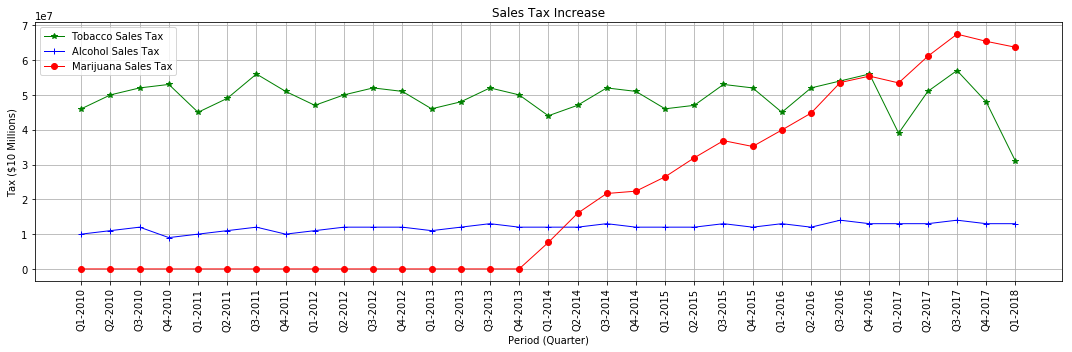

In [7]:
# Plot the data
x_axis = np.arange(len(df_plot))
lt_period = df_plot.index.tolist()
ss_total_sales_tax   = df_plot["Total Sales Tax"]
ss_tobacco_sales_tax = df_plot["Total Tobacco Sales Tax"]
ss_alcohol_sales_tax = df_plot["Total Alcohol Sales Tax"]
ss_marij_sales_tax   = df_plot["Total Marijuana Sales Tax"]

# Create a handle for each plot
#ss_total_sales_tax.plot(label="Total Sales Tax",
#                        marker="o", color="blue", linewidth=1)
ss_tobacco_sales_tax.plot(label="Tobacco Sales Tax",
                          marker="*", color="Green", linewidth=1, figsize=(15,5))
ss_alcohol_sales_tax.plot(label="Alcohol Sales Tax",
                          marker="+", color="blue", linewidth=1, figsize=(15,5))
ss_marij_sales_tax.plot(label="Marijuana Sales Tax",
                        marker="o", color="Red", linewidth=1, figsize=(15,5))

# Set labels
plt.xticks(x_axis, lt_period, rotation="vertical")
plt.title("Sales Tax Increase")
plt.xlabel("Period (Quarter)")
plt.ylabel("Tax ($10 Millions)")
plt.legend()

# Set sizes
plt.grid()
plt.tight_layout()

# Save and show
plt.savefig(pngfile_tax_curve)
plt.show()


In [8]:
# Convert Quarterly revenues to Yearly revenue for the final output
lt_quarters = ["Q1", "Q2", "Q3", "Q4"]
lt_year = []
lt_yearly_total_revenue   = []
lt_yearly_total_sales_tax = []
lt_yearly_total_tobacco   = []
lt_yearly_total_alcohol   = []
lt_yearly_total_marij     = []
n_yearly_total_revenue    = 0
n_yearly_total_sales_tax  = 0
n_yearly_total_tobacco    = 0
n_yearly_total_alcohol    = 0
n_yearly_total_marij      = 0

for index, row in df_plot.iterrows():

    s_cache = str(index)
    s_quarter = s_cache.split("-")[0]
    s_year    = s_cache.split("-")[1]
    n_yearly_total_revenue   += row["Total Revenue"]
    n_yearly_total_sales_tax += row["Total Sales Tax"]
    n_yearly_total_tobacco   += row["Total Tobacco Sales Tax"]
    n_yearly_total_alcohol   += row["Total Alcohol Sales Tax"]
    n_yearly_total_marij     += row["Total Marijuana Sales Tax"]

    if s_quarter == "Q4":
        lt_year.append(s_year)
        lt_yearly_total_revenue.append(n_yearly_total_revenue)
        lt_yearly_total_sales_tax.append(n_yearly_total_sales_tax)
        lt_yearly_total_tobacco.append(n_yearly_total_tobacco)
        lt_yearly_total_alcohol.append(n_yearly_total_alcohol)
        lt_yearly_total_marij.append(n_yearly_total_marij)
        n_yearly_total_revenue    = 0
        n_yearly_total_sales_tax  = 0
        n_yearly_total_tobacco    = 0
        n_yearly_total_alcohol    = 0
        n_yearly_total_marij      = 0

# Create the output chart
df_output = pd.DataFrame({"Year": lt_year,
                          "State": "Colorado",
                          "Total Revenue": lt_yearly_total_revenue,
                          "Total Sales Tax": lt_yearly_total_sales_tax,
                          "Total Tobacco Sales Tax": lt_yearly_total_tobacco,
                          "Total Alcohol Sales Tax": lt_yearly_total_alcohol,
                          "Total Marijuana Sales Tax": lt_yearly_total_marij })

df_output["Tobacco's Share of Total Sales Tax %"]   = df_output["Total Tobacco Sales Tax"] * 100 / \
                                                      df_output["Total Sales Tax"]
df_output["Alchohol's Share of Total Sales Tax %"]  = df_output["Total Alcohol Sales Tax"] * 100 / \
                                                      df_output["Total Sales Tax"]
df_output["Marijuana's Share of Total Sales Tax %"] = df_output["Total Marijuana Sales Tax"] * 100 / \
                                                      df_output["Total Sales Tax"]
df_output.to_csv(csvfile_output)
df_output

,Year,State,Total Revenue,Total Sales Tax,Total Tobacco Sales Tax,Total Alcohol Sales Tax,Total Marijuana Sales Tax,Tobacco's Share of Total Sales Tax %,Alchohol's Share of Total Sales Tax %,Marijuana's Share of Total Sales Tax %
0,2010,Colorado,8.546000e+09,2.116000e+09,201000000.0,42000000.0,0.0,9.499055,1.984877,0.000000
1,2011,Colorado,9.837000e+09,2.838000e+09,201000000.0,43000000.0,0.0,7.082452,1.515152,0.000000
2,2012,Colorado,1.062200e+10,2.991000e+09,200000000.0,47000000.0,0.0,6.686727,1.571381,0.000000
3,2013,Colorado,1.149300e+10,3.156000e+09,196000000.0,48000000.0,0.0,6.210393,1.520913,0.000000
4,2014,Colorado,1.233300e+10,3.442000e+09,194000000.0,49000000.0,67594325.0,5.636258,1.423591,1.963810
5,2015,Colorado,1.292700e+10,3.663000e+09,198000000.0,49000000.0,130411174.0,5.405405,1.337701,3.560229
6,2016,Colorado,1.293600e+10,3.607000e+09,207000000.0,52000000.0,193604811.0,5.738841,1.441641,5.367475
7,2017,Colorado,1.380300e+10,4.069000e+09,195000000.0,53000000.0,247368474.0,4.792332,1.302531,6.079343


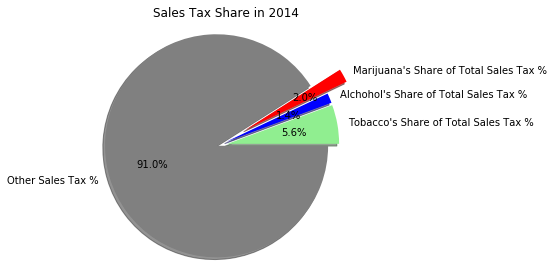

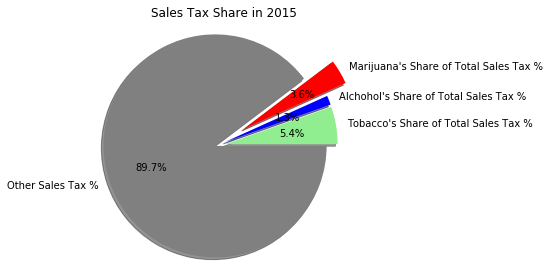

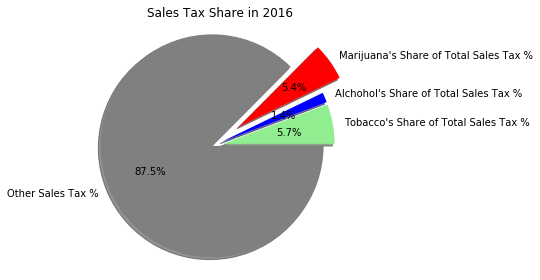

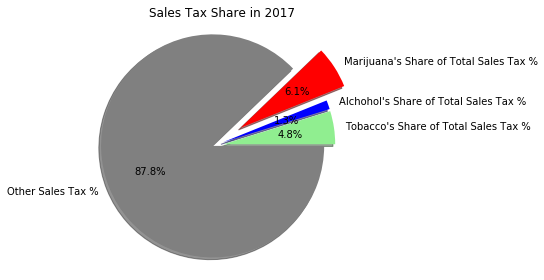

In [9]:
# Plot the sales tax share from 2014 to 2017
lt_year = ["2014", "2015", "2016", "2017"]

for pie_year in lt_year:

    # Labels for the sections of our pie chart
    lt_labels = ["Tobacco's Share of Total Sales Tax %", 
                 "Alchohol's Share of Total Sales Tax %", 
                 "Marijuana's Share of Total Sales Tax %", 
                 "Other Sales Tax %"]

    # The values of each section of the pie chart
    lt_sizes = df_output.loc[(df_output["Year"]==pie_year), 
                             "Tobacco's Share of Total Sales Tax %"].tolist()
    lt_sizes.append(df_output.loc[(df_output["Year"]==pie_year), 
                             "Alchohol's Share of Total Sales Tax %"].tolist()[0])
    lt_sizes.append(df_output.loc[(df_output["Year"]==pie_year), 
                             "Marijuana's Share of Total Sales Tax %"].tolist()[0])
    lt_sizes.append(100-(lt_sizes[0]+lt_sizes[1]+lt_sizes[2]))

    # The colors of each section of the pie chart
    lt_colors = ["lightgreen", "blue", "red", "gray"]
    # Tells matplotlib to seperate sections
    list_explode = (0.1, 0.1, 0.3, 0)

    # Creates the pie chart with automatic percentages value created
    plt.pie(lt_sizes, explode=list_explode, labels=lt_labels, colors=lt_colors,
            autopct="%1.1f%%", shadow=True, startangle=0)
    plt.axis("equal")
    plt.title(f"Sales Tax Share in {pie_year}")
    plt.tight_layout()

    # Save and show
    plt.savefig(f"{pngfile_tax_pie}_{pie_year}.png")
    plt.show()
